<a href="https://colab.research.google.com/github/jordan-dsouza/SlashMarkInternship/blob/main/Black_Friday_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/nanthasnk/Black-Friday-Sales-Prediction/master/Data/BlackFridaySales.csv")
#data = pd.read_csv("BlackFridaySales.csv")

In [3]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
data.shape

(550068, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


`Age` should be treated as a numerical column

`City_Category` we can convert this to a numerical column with label encoder.

`Gender` has two values and should be converted to binary values.

`Product_Category_2` and `Product_Category_3` have null values.

In [6]:
#Null values:
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [7]:
#Unique elements:
data.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

We can drop `User_ID` and `Product_ID` for model prediction as it has more unique values.

# EDA

## Target Variable Purchase

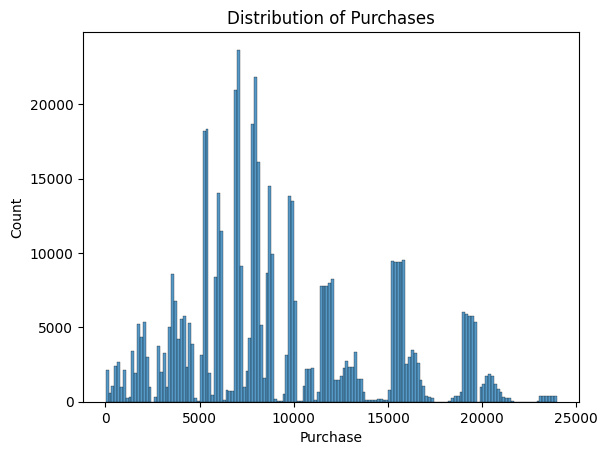

In [8]:
sns.histplot(data["Purchase"])
plt.title("Distribution of Purchases")
plt.show()

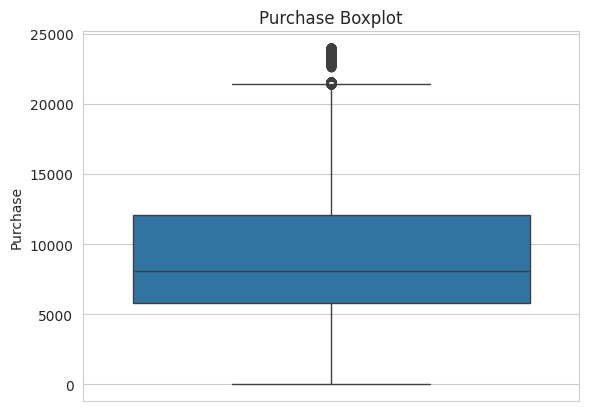

In [9]:
sns.set_style("whitegrid")
sns.boxplot(data["Purchase"])
plt.title("Purchase Boxplot")
plt.show()

In [10]:
data["Purchase"].describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

The purchase distribution is right skewed with multiple peaks. Log transformation needed.

### Gender

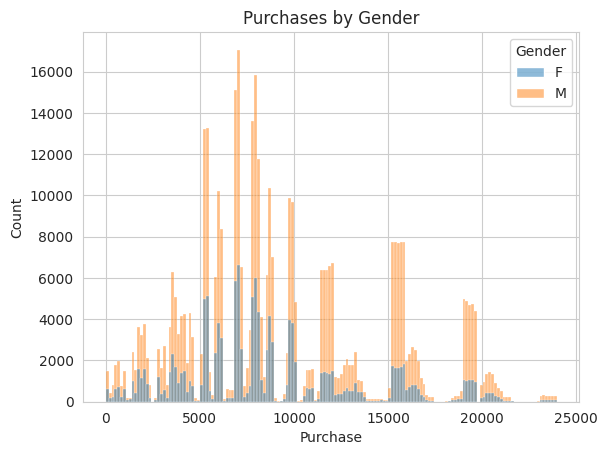

In [11]:
sns.histplot(data = data, x = data["Purchase"], hue = "Gender")
plt.title("Purchases by Gender")
plt.show()

In [12]:
data["Gender"].value_counts(normalize=True)*100

M    75.310507
F    24.689493
Name: Gender, dtype: float64

There are more males than females

In [13]:
data.groupby("Gender").mean()["Purchase"]

<ipython-input-13-b2e65a1fdba5>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby("Gender").mean()["Purchase"]


Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64

On average the male spends more money on purchase than female.

### Occupation

In [14]:
'''plt.figure(figsize=(18,5))
sns.barplot(data["Occupation"])
plt.show()'''

'plt.figure(figsize=(18,5))\nsns.barplot(data["Occupation"])\nplt.show()'

Occupation has 21 different values that do not correspond to a name.

In [15]:
occup = pd.DataFrame(data.groupby("Occupation").mean()["Purchase"])
occup

<ipython-input-15-ba0fa628b3cd>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  occup = pd.DataFrame(data.groupby("Occupation").mean()["Purchase"])


,Purchase
Occupation,
0,9124.428588
1,8953.193270
2,8952.481683
3,9178.593088
4,9213.980251
5,9333.149298
6,9256.535691
7,9425.728223
8,9532.592497


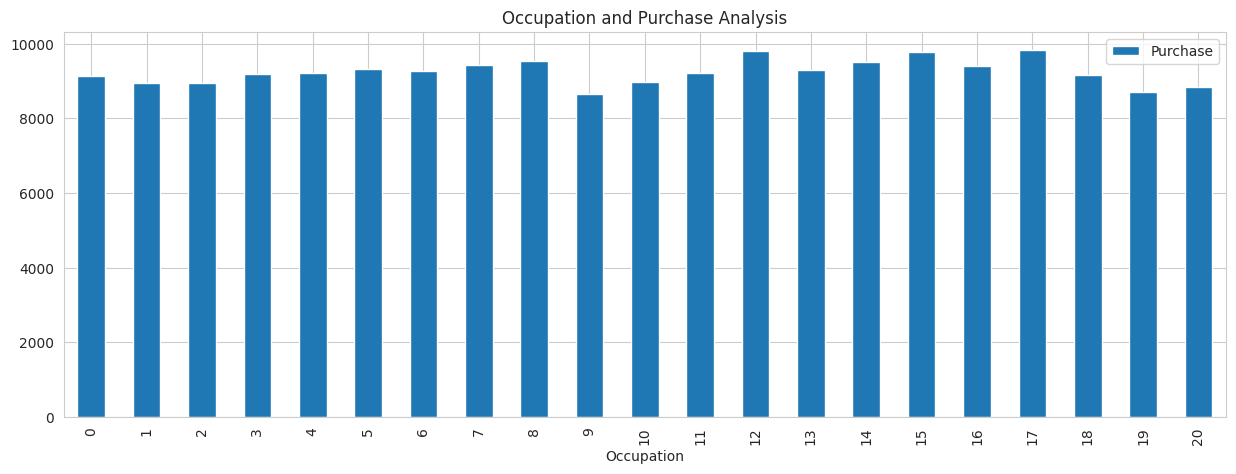

In [16]:
occup.plot(kind='bar',figsize=(15,5))
plt.title("Occupation and Purchase Analysis")
plt.show()

Occupations with the highest representations will have the highest amounts of purchases. Amount spent on average is almost same for all occupations.

### City_Category

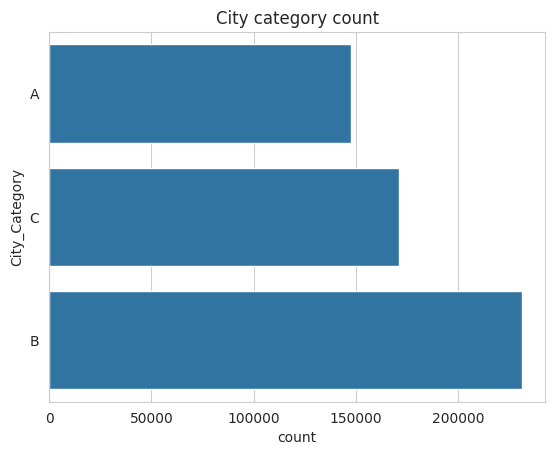

In [17]:
sns.countplot(data["City_Category"])
plt.title("City category count")
plt.show()

It is observed that city category B has made the most number of puchases.

<ipython-input-18-c07b9eb54d25>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby("City_Category").mean()["Purchase"].plot(kind="bar")


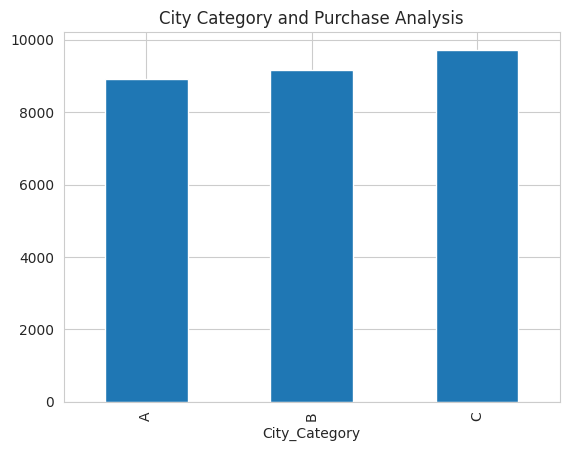

In [18]:
data.groupby("City_Category").mean()["Purchase"].plot(kind="bar")
plt.title("City Category and Purchase Analysis")
plt.show()

City type ‘C’ people spend the most.

### Stay_In_Current_City_Years

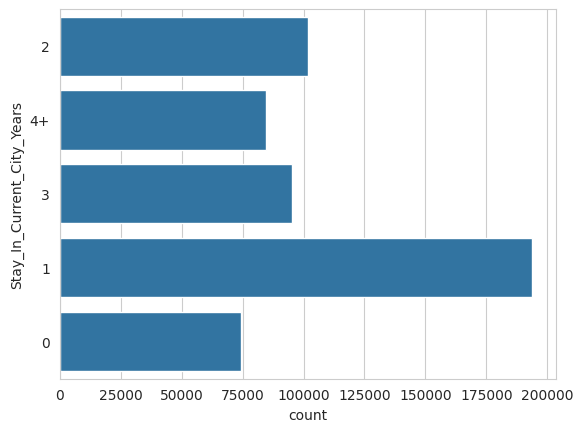

In [19]:
sns.countplot(data["Stay_In_Current_City_Years"])
plt.show()

It looks like if someone is new in town (1 Year) they take advantage of the Black Friday discounts.

<ipython-input-20-1ac7395f0b29>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby("Stay_In_Current_City_Years").mean()["Purchase"].plot(kind="bar")


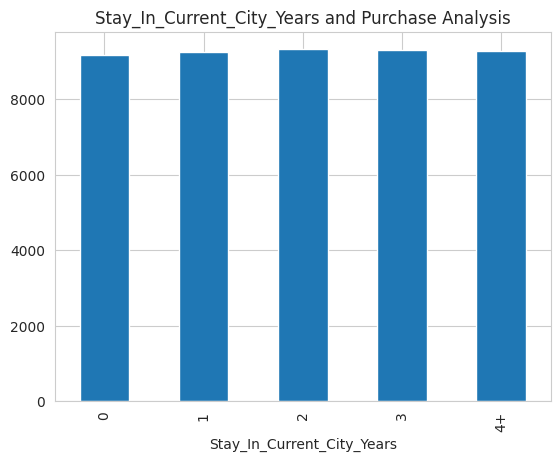

In [20]:
data.groupby("Stay_In_Current_City_Years").mean()["Purchase"].plot(kind="bar")
plt.title("Stay_In_Current_City_Years and Purchase Analysis")
plt.show()

People who are new in city have higher number of purchases, however looking at it individually they tend to spend the same amount independently of how many years the have lived in their current city.

### Age

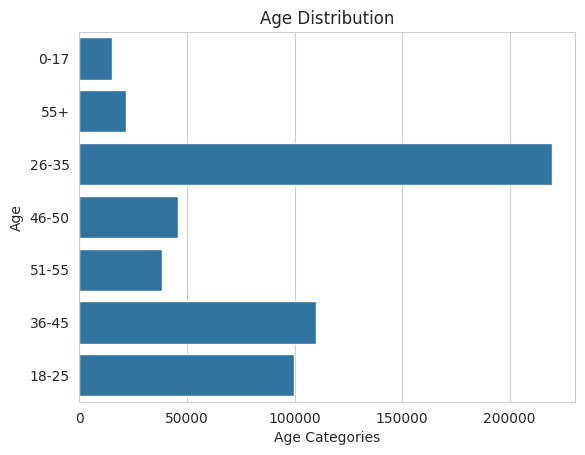

In [21]:
sns.countplot(data["Age"])
plt.title("Age Distribution")
plt.xlabel("Age Categories")
plt.show()

Most number of purchases done by the '26-35' Age group.

<ipython-input-22-7a2c125ecf9b>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby("Age").mean()["Purchase"].plot(kind="bar")


<Axes: xlabel='Age'>

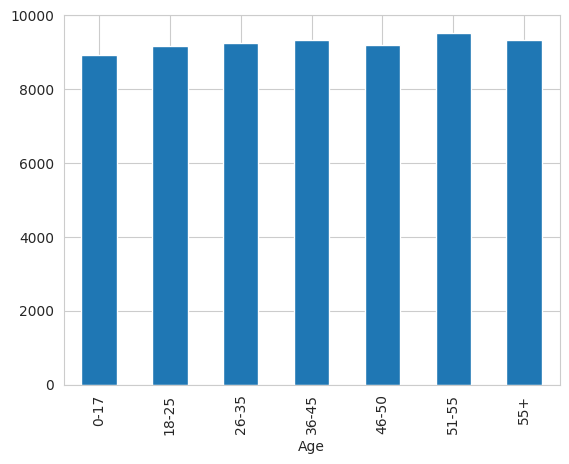

In [22]:
data.groupby("Age").mean()["Purchase"].plot(kind="bar")

In case of average amount, '51-55' age group has a slightly higher purchase count than the other groups with are almost similar.

<ipython-input-23-17a487c467aa>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby("Age").sum()["Purchase"].plot(kind="bar")


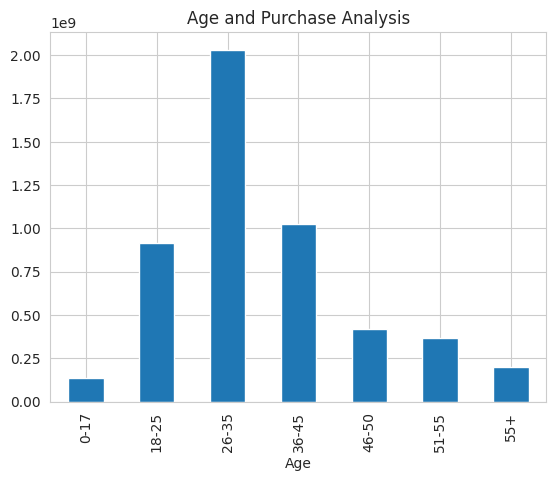

In [23]:
data.groupby("Age").sum()["Purchase"].plot(kind="bar")
plt.title("Age and Purchase Analysis")
plt.show()

Total amount spent in purchase is in accordance with the number of purchases made, distributed by age.

### Product_Category_1

In [24]:
'''plt.figure(figsize=(18,5))
sns.countplot(data["Product_Category_1"])
plt.show()'''

'plt.figure(figsize=(18,5))\nsns.countplot(data["Product_Category_1"])\nplt.show()'

<ipython-input-25-39976d16b610>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby("Product_Category_1").mean()["Purchase"].plot(kind="bar",figsize=(18,5))


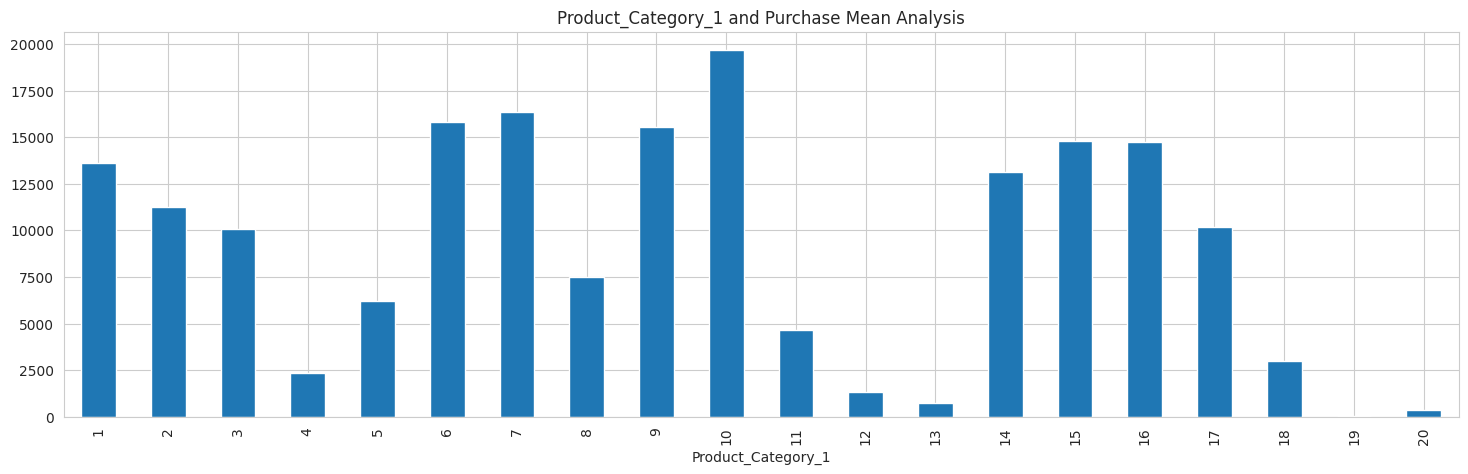

In [25]:
data.groupby("Product_Category_1").mean()["Purchase"].plot(kind="bar",figsize=(18,5))
plt.title("Product_Category_1 and Purchase Mean Analysis")
plt.show()

In Product Category 1, '10' has the highest purchase and '20' the lowest. We do not know what the numbers like '10' or '20' correspond to.

<ipython-input-26-ffe6b4fff2c6>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby("Product_Category_1").sum()["Purchase"].plot(kind="bar",figsize=(18,5))


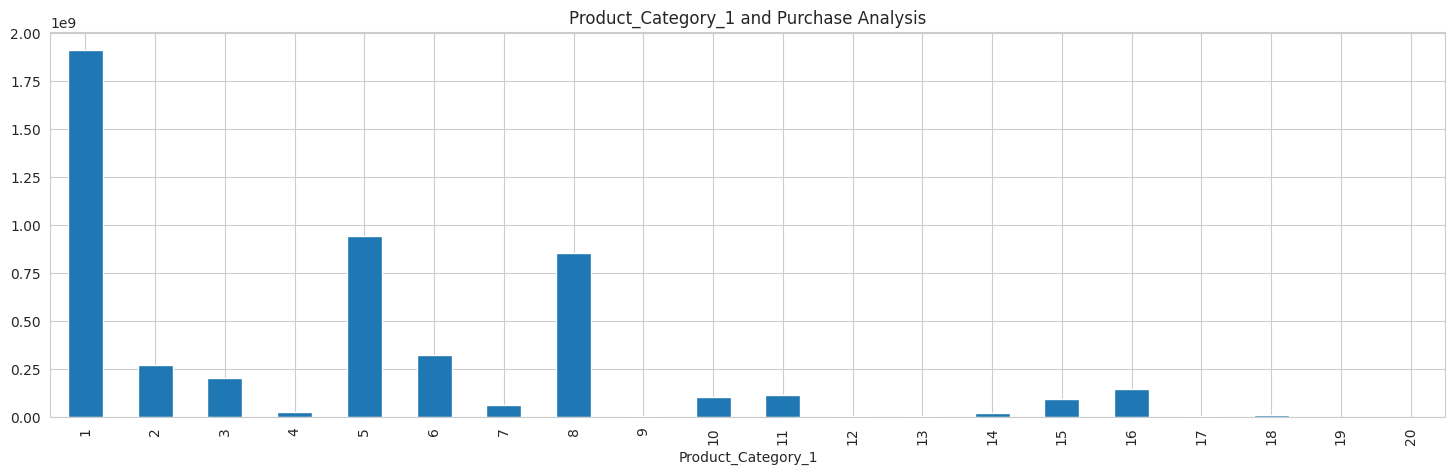

In [26]:
data.groupby("Product_Category_1").sum()["Purchase"].plot(kind="bar",figsize=(18,5))
plt.title("Product_Category_1 and Purchase Analysis")
plt.show()

### Product_Category_2

<ipython-input-27-81ba6e500047>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby("Product_Category_2").mean()["Purchase"].plot(kind="bar",figsize=(18,5))


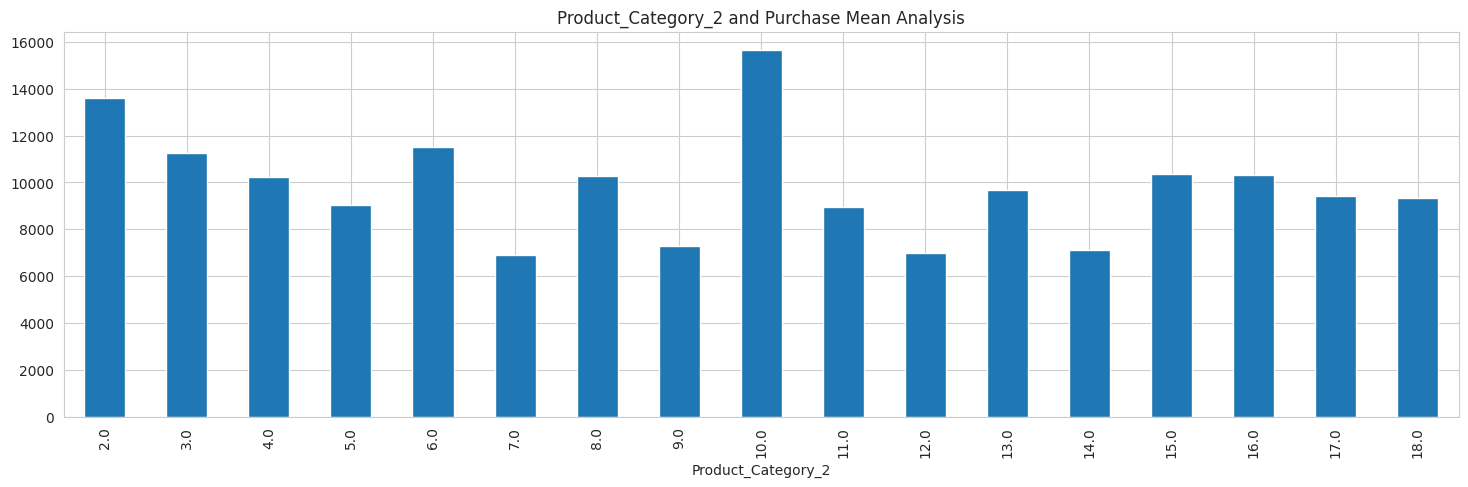

In [27]:
data.groupby("Product_Category_2").mean()["Purchase"].plot(kind="bar",figsize=(18,5))
plt.title("Product_Category_2 and Purchase Mean Analysis")
plt.show()

Here in Product Category 2, '10' has the highest value and '7' the lowest.

### Product_Category_3

<ipython-input-28-05047fa64daa>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby("Product_Category_3").mean()["Purchase"].plot(kind="bar",figsize=(18,5))


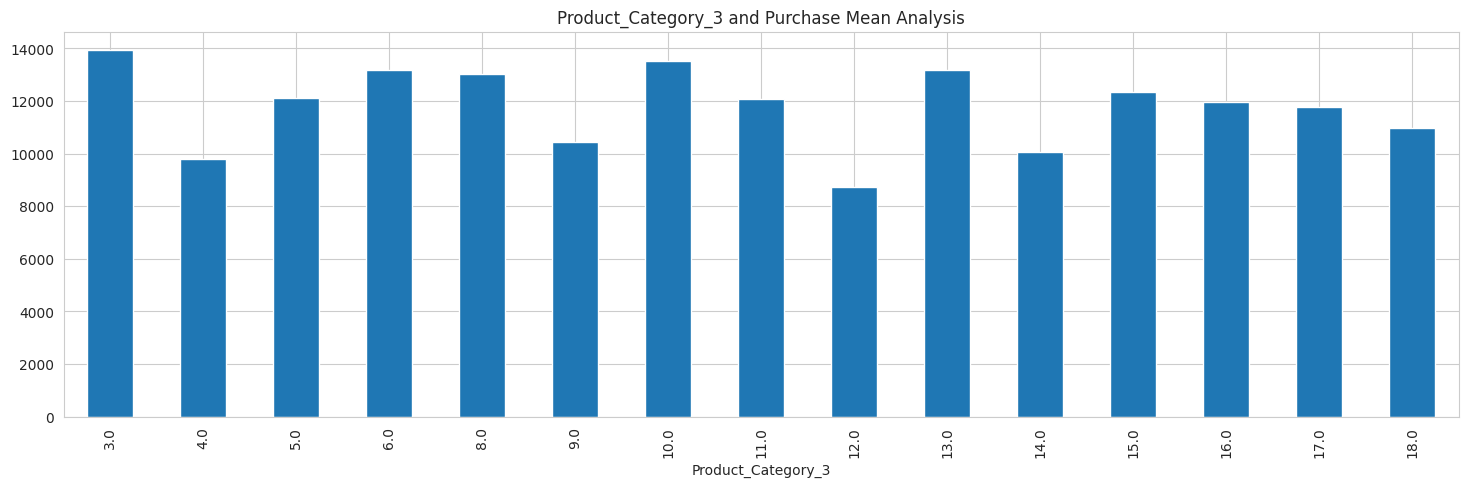

In [28]:
data.groupby("Product_Category_3").mean()["Purchase"].plot(kind="bar",figsize=(18,5))
plt.title("Product_Category_3 and Purchase Mean Analysis")
plt.show()

In Product category 3, '3' has the highest value and '12' the lowest.

## Correlation HeatMap

<ipython-input-29-dff020e25490>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


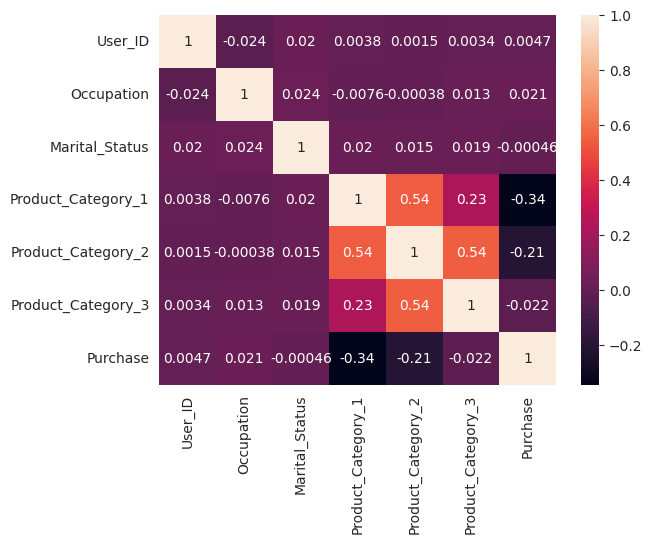

In [29]:
sns.heatmap(data.corr(),annot=True)
plt.show()

Correlation is seen in the product category columns 1,2,3.

## Encoding the categorical variables

In [30]:
df = data.copy()

In [31]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [32]:
df["Stay_In_Current_City_Years"] = df["Stay_In_Current_City_Years"].replace(to_replace="4+",value="4")

Getting dummy variables for "Stay_In_Current_City_Years".

In [33]:
#Dummy Variables:
df = pd.get_dummies(df, columns=["Stay_In_Current_City_Years"])

In [35]:
from sklearn.preprocessing import LabelEncoder
lr = LabelEncoder()

Label encoder transforms non numerical labels to numerical labels.

In [36]:
df["Gender"] = lr.fit_transform(df["Gender"])

In [37]:
df["Age"] = lr.fit_transform(df["Age"])

In [38]:
df["City_Category"] = lr.fit_transform(df["City_Category"])

In [39]:
#Getting rid of null values by fillibg with a value of similar datatype:
df["Product_Category_2"] =df["Product_Category_2"].fillna(0).astype("int64")
df["Product_Category_3"] =df["Product_Category_3"].fillna(0).astype("int64")

In [40]:
df.isnull().sum()

User_ID                         0
Product_ID                      0
Gender                          0
Age                             0
Occupation                      0
City_Category                   0
Marital_Status                  0
Product_Category_1              0
Product_Category_2              0
Product_Category_3              0
Purchase                        0
Stay_In_Current_City_Years_0    0
Stay_In_Current_City_Years_1    0
Stay_In_Current_City_Years_2    0
Stay_In_Current_City_Years_3    0
Stay_In_Current_City_Years_4    0
dtype: int64

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 16 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   User_ID                       550068 non-null  int64 
 1   Product_ID                    550068 non-null  object
 2   Gender                        550068 non-null  int64 
 3   Age                           550068 non-null  int64 
 4   Occupation                    550068 non-null  int64 
 5   City_Category                 550068 non-null  int64 
 6   Marital_Status                550068 non-null  int64 
 7   Product_Category_1            550068 non-null  int64 
 8   Product_Category_2            550068 non-null  int64 
 9   Product_Category_3            550068 non-null  int64 
 10  Purchase                      550068 non-null  int64 
 11  Stay_In_Current_City_Years_0  550068 non-null  uint8 
 12  Stay_In_Current_City_Years_1  550068 non-null  uint8 
 13 

In [42]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4
0,1000001,P00069042,0,0,10,0,0,3,0,0,8370,0,0,1,0,0
1,1000001,P00248942,0,0,10,0,0,1,6,14,15200,0,0,1,0,0
2,1000001,P00087842,0,0,10,0,0,12,0,0,1422,0,0,1,0,0
3,1000001,P00085442,0,0,10,0,0,12,14,0,1057,0,0,1,0,0
4,1000002,P00285442,1,6,16,2,0,8,0,0,7969,0,0,0,0,1


## Dropping the irrelevant columns

User and Product ID have no use in prediction.

In [43]:
df = df.drop(["User_ID","Product_ID"],axis=1)

## Splitting data into independent (x) and dependent (y) variables for model creation:

In [44]:
X = df.drop("Purchase",axis=1)

In [45]:
#We are predicting Black Friday Sales i.e. Purchases.
y = df["Purchase"]

In [49]:
#80% dataset for training, 20% for testing:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Modeling

### Linear Regression

In Linear Regression, y = mx + c, m - coefficient, c - intercept.

In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [52]:
lr.intercept_

9538.925645802743

In [53]:
lr.coef_

array([ 475.14245227,  104.88485684,    5.39509742,  314.10536433,
        -50.26137519, -348.38323835,   12.99854533,  144.06749115,
        -24.36540513,   -1.48623425,   11.16819936,  -10.80976481,
         25.49320483])

In [54]:
y_pred = lr.predict(X_test)

In [55]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [56]:
mean_absolute_error(y_test, y_pred)

3526.578414270395

In [57]:
mean_squared_error(y_test, y_pred)

21332098.540805105

In [58]:
r2_score(y_test, y_pred)

0.151001123626186

In [59]:
from math import sqrt
print("RMSE of Linear Regression Model is ",sqrt(mean_squared_error(y_test, y_pred)))

RMSE of Linear Regression Model is  4618.668481370481


# DecisionTreeRegressor

In [60]:
from sklearn.tree import DecisionTreeRegressor

# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0)

In [61]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [62]:
dt_y_pred = regressor.predict(X_test)

In [63]:
mean_absolute_error(y_test, dt_y_pred)

2367.7678114739747

In [ ]:
mean_squared_error(y_test, dt_y_pred)

In [64]:
r2_score(y_test, dt_y_pred)

0.5536764225638917

In [65]:
from math import sqrt
print("RMSE of Linear Regression Model is ",sqrt(mean_squared_error(y_test, dt_y_pred)))

RMSE of Linear Regression Model is  3348.7918000856694


# Random Forest Regressor

In [66]:
from sklearn.ensemble import RandomForestRegressor

# create a regressor object
RFregressor = RandomForestRegressor(random_state = 0)

In [67]:
RFregressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [68]:
rf_y_pred = RFregressor.predict(X_test)

In [69]:
mean_absolute_error(y_test, rf_y_pred)

2224.9873199397666

In [70]:
mean_squared_error(y_test, rf_y_pred)

9355096.82599648

In [71]:
r2_score(y_test, rf_y_pred)

0.627675323248367

In [72]:
from math import sqrt
print("RMSE of Linear Regression Model is ",sqrt(mean_squared_error(y_test, rf_y_pred)))

RMSE of Linear Regression Model is  3058.6102769062422


# XGBoost Regressor

In [73]:
from xgboost.sklearn import XGBRegressor

In [74]:
xgb_reg = XGBRegressor(learning_rate=1.0, max_depth=6, min_child_weight=40, seed=0)

xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=1.0, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=40, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [75]:
xgb_y_pred = xgb_reg.predict(X_test)

In [76]:
mean_absolute_error(y_test, xgb_y_pred)

2148.0810074237875

In [78]:
mean_squared_error(y_test, xgb_y_pred)

8318650.359453288

In [79]:
r2_score(y_test, xgb_y_pred)

0.6689249866996013

In [80]:
from math import sqrt
print("RMSE of Linear Regression Model is ",sqrt(mean_squared_error(y_test, xgb_y_pred)))

RMSE of Linear Regression Model is  2884.2070590464355


The ML algorithm that perform the best was XGBoost Regressor Model with RMSE = 2884. The lower the RMSE, the better the model.